In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = None

In [9]:
df1 = pd.read_csv('./final_data/big3-cluster20_2019')

In [10]:
df=df1.drop(['Unnamed: 0','Dropoff_Community_Area','Cluster_id'],axis=1)
df

,Temperature,HourlyPrecipitation,HourlyVisibility,HourlyWindSpeed,Week,drop_id,Time_id
0,34,0.0,9.94,9,2,8,0
1,33,0.0,6.00,13,2,32,2
2,32,0.0,4.00,10,2,32,4
3,30,0.0,9.94,11,2,8,6
4,30,0.0,9.94,11,2,8,6
...,...,...,...,...,...,...,...
184539,28,0.0,9.94,14,2,-1,18
184540,28,0.0,10.00,15,2,-1,19
184541,28,0.0,10.00,15,2,-1,19
184542,27,0.0,10.00,10,2,-1,20


In [70]:
df[df['drop_id']==-1]

,Temperature,HourlyPrecipitation,HourlyVisibility,HourlyWindSpeed,Week,drop_id,Time_id
20782,34,0.0,9.94,9,2,-1,0
20783,34,0.0,9.94,9,2,-1,0
20784,34,0.0,9.94,9,2,-1,0
20785,34,0.0,9.94,9,2,-1,0
20786,33,0.0,10.00,10,2,-1,1
...,...,...,...,...,...,...,...
184539,28,0.0,9.94,14,2,-1,18
184540,28,0.0,10.00,15,2,-1,19
184541,28,0.0,10.00,15,2,-1,19
184542,27,0.0,10.00,10,2,-1,20


In [36]:
from sklearn.decomposition import PCA
dx= PCA(n_components=2).fit_transform(X)

In [50]:
import numpy as np
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix

# import some data to play with
iris = datasets.load_iris()
X = df.drop(['drop_id'],axis=1) 
y = df['drop_id']

#model = neighbors.KNeighborsClassifier() 
#model.fit(X, y)

X_train, X_test, y_train, y_test = train_test_split(dx, y, test_size=0.3)

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

model = neighbors.KNeighborsClassifier(n_neighbors= 50,p=1)
model.fit(X_train, y_train)


X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
num_correct_samples = accuracy_score(y_test, y_pred, normalize=False)
con_matrix = confusion_matrix(y_test, y_pred)

print('number of correct sample: {}'.format(num_correct_samples))
print('accuracy: {}'.format(accuracy))
print('confusion matrix: \n{}'.format(con_matrix))

number of correct sample: 49120
accuracy: 0.8872191315656384
confusion matrix: 
[[49100    41     0]
 [ 5119    20     0]
 [ 1078     6     0]]


In [51]:
predict = model.predict(X_test)

In [63]:
predict = model.predict(X_test)
pre = pd.DataFrame(predict)#.to_csv('test.csv')
pre[pre[0]==8]

In [71]:
pre[pre[0]==32]

,0


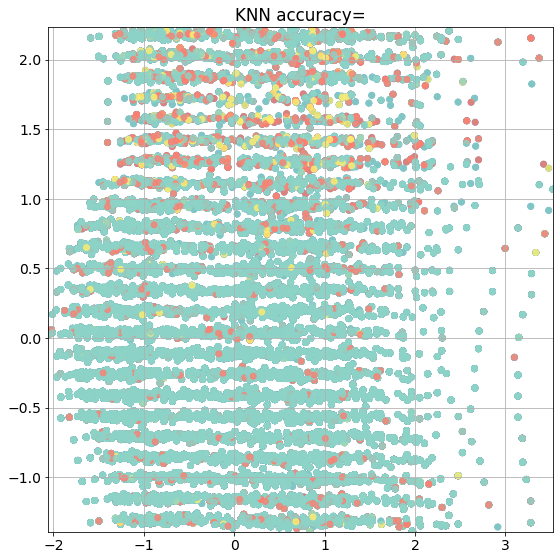

In [55]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.rcParams['font.size'] = 14
plt.title('KNN accuracy=')
# 畫出訓練集資料
# 預測標籤 (大圓)
plt.scatter(*X_test.T, c=predict, cmap='tab10', s=35, alpha=0.8)
# 實際標籤 (小圓)
plt.scatter(*X_test.T, c=y_test, cmap='Set3', s=35, alpha=0.8)
plt.grid(True)
plt.xlim([np.amin(X_test.T[0]), np.amax(X_test.T[0])])
plt.ylim([np.amin(X_test.T[1]), np.amax(X_test.T[1])])
plt.tight_layout()
plt.show()

In [ ]:
dx_train, dx_test, dy_train, dy_test

X_train, X_test, y_train, y_test

NameError: name 'indices' is not defined

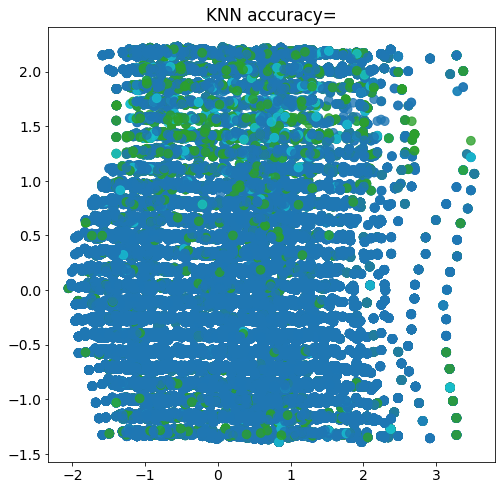

In [42]:
plt.figure(figsize=(8, 8))
plt.rcParams['font.size'] = 14
plt.title('KNN accuracy=')
# 畫出訓練集資料
plt.scatter(*X_train.T, c=y_train, cmap='tab10', s=75, alpha=0.8)
# 對最靠近測試點的 k 個訓練集點標上黑方框
plt.scatter(*X_train[indices][0].T, color='None', s=75, alpha=0.8,
            linewidth=2, edgecolors='black', marker='s', 
            label=f'{k}-neighbors')
# 畫出測試點 (紅三角)
plt.scatter(*X_test[idx], color='red', s=75, marker='^',
            label=f'Label 0={pred_prob[idx][0]:.1f}%, ' + \
                  f'1={pred_prob[idx][1]:.1f}% ' + \
                  f'(actual={predict[idx]})')
plt.legend()  # 顯示圖例 (上面的 label 參數文字)
plt.grid(True)
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.tight_layout()
plt.show()